# Coronary Heart Disease Prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv(r"D:\Data Science\Raw datasets\framingham.csv")
dataset.drop(["education"],axis=1,inplace=True)
dataset.head(2)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0


In [3]:
dataset.shape

(4238, 15)

In [4]:
dataset.duplicated().sum()

0

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [6]:
dataset.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Filling null data

In [7]:
dataset["cigsPerDay"]=dataset["cigsPerDay"].fillna(dataset["cigsPerDay"].mode()[0])
dataset["BPMeds"]=dataset["BPMeds"].fillna(dataset['BPMeds'].median())
dataset["totChol"]=dataset["totChol"].fillna(dataset["totChol"].median())
dataset["BMI"]=dataset["BMI"].fillna(dataset["BMI"].median())
dataset["glucose"]=dataset["glucose"].fillna(dataset["glucose"].median())
dataset["heartRate"]=dataset["heartRate"].fillna(dataset["heartRate"].mode()[0])

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4238 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4238 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4238 non-null   float64
 12  heartRate        4238 non-null   float64
 13  glucose          4238 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [9]:
dataset["male"]=dataset["male"].astype("object")

In [10]:
dataset["male"].unique()

array([1, 0], dtype=object)

In [11]:
dataset["male"].replace([1,0],["Male","Female"],inplace=True)

In [12]:
dataset["male"].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
dataset["Gender"]=dataset["male"]
dataset.drop(["male"],axis=1,inplace=True)

# Removing outliers for normal dist plot


In [14]:
# ft=FunctionTransformer(func=lambda x:(1/x**4))
# dataset["age"]=ft.fit_transform(dataset[["age"]])

In [15]:
q1,q3=dataset["glucose"].quantile(0.25),dataset["glucose"].quantile(0.75)
q1,q3
iqr=q3-q1
iqr
min_glu,max_glu=(q1-(1.5*iqr)),(q3+(1.5*iqr))
min_glu,max_glu
dataset=dataset[dataset["glucose"]<max_glu]

In [16]:
q1,q3=dataset["sysBP"].quantile(0.25),dataset["sysBP"].quantile(0.75)
iqr=q3-q1
iqr
min_sysbp,max_sysbp=(q1-(1.5*iqr)),(q3+(1.5*iqr))
min_sysbp,max_sysbp
dataset=dataset[dataset["sysBP"]<max_sysbp]


In [17]:
q1,q3=dataset["diaBP"].quantile(0.25),dataset["diaBP"].quantile(0.75)
iqr=q3-q1
iqr
min_dibp,max_dibp=(q1-(1.5*iqr)),(q3+(1.5*iqr))
min_dibp,max_dibp
dataset=dataset[dataset["diaBP"]<max_dibp]


# Changing data types

In [18]:
dataset["cigsPerDay"]=dataset["cigsPerDay"].astype("int32")
dataset["BPMeds"]=dataset["BPMeds"].astype("int32")
dataset["totChol"]=dataset["totChol"].astype("int32")
dataset["heartRate"]=dataset["heartRate"].astype("int32")
dataset["glucose"]=dataset["glucose"].astype("int32")

In [19]:
dataset.head(2)

,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Gender
0,39,0,0,0,0,0,0,195,106.0,70.0,26.97,80,77,0,Male
1,46,0,0,0,0,0,0,250,121.0,81.0,28.73,95,76,0,Female


In [20]:
dataset.corr()

C:\Users\doshi\AppData\Local\Temp\ipykernel_29472\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.203316,-0.177191,0.098985,0.051166,0.273232,0.022437,0.263227,0.366694,0.169141,0.116694,-0.036001,0.075417,0.210238
currentSmoker,-0.203316,1.000000,0.760123,-0.051682,-0.021878,-0.086516,-0.010778,-0.038556,-0.117442,-0.103913,-0.163523,0.067806,-0.064950,0.033161
cigsPerDay,-0.177191,0.760123,1.000000,-0.044214,-0.025317,-0.043478,-0.004495,-0.019240,-0.063316,-0.039867,-0.083181,0.077798,-0.074550,0.067460
BPMeds,0.098985,-0.051682,-0.044214,1.000000,0.112081,0.243405,0.012861,0.058737,0.190924,0.140951,0.080915,-0.002234,-0.011684,0.064526
prevalentStroke,0.051166,-0.021878,-0.025317,0.112081,1.000000,0.076633,-0.005357,-0.012395,0.058826,0.049231,0.007274,-0.012282,-0.011565,0.066452
prevalentHyp,0.273232,-0.086516,-0.043478,0.243405,0.076633,1.000000,0.041048,0.154751,0.688566,0.591917,0.280026,0.123827,0.044150,0.144680
diabetes,0.022437,-0.010778,-0.004495,0.012861,-0.005357,0.041048,1.000000,0.016672,0.035710,0.022191,0.012636,0.012194,0.004679,0.001600
totChol,0.263227,-0.038556,-0.019240,0.058737,-0.012395,0.154751,0.016672,1.000000,0.211563,0.175473,0.127916,0.095970,0.025472,0.067283
sysBP,0.366694,-0.117442,-0.063316,0.190924,0.058826,0.688566,0.035710,0.211563,1.000000,0.751454,0.295034,0.164394,0.066176,0.168133
diaBP,0.169141,-0.103913,-0.039867,0.140951,0.049231,0.591917,0.022191,0.175473,0.751454,1.000000,0.346560,0.165136,0.019713,0.099667


C:\Users\doshi\AppData\Local\Temp\ipykernel_29472\2500993783.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


<Axes: >

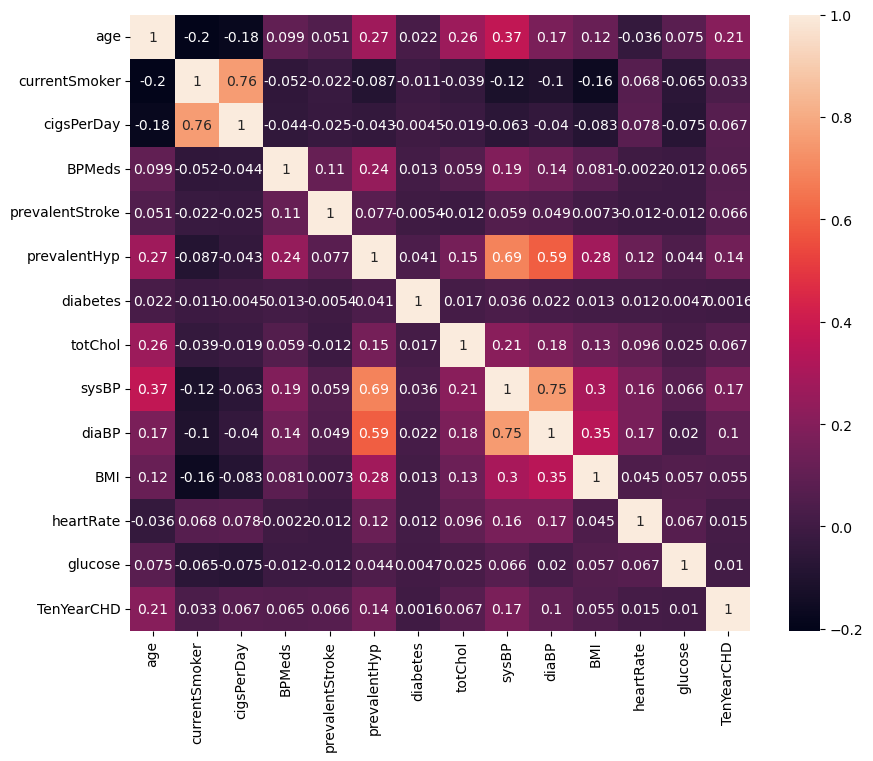

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(),annot=True)

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(dataset["Gender"])
dataset["Gender"]=le.transform(dataset["Gender"])

In [23]:
inp=dataset[["age","Gender","cigsPerDay","totChol","sysBP","diaBP","BMI","heartRate","glucose"]]
out=dataset["TenYearCHD"]

In [24]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(inp)
inp=pd.DataFrame(ss.transform(inp),columns=inp.columns)
inp

,age,Gender,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,-1.190890,1.145119,-0.762102,-0.931187,-1.291937,-1.123099,0.355075,0.380719,-0.084795
1,-0.365423,-0.873272,-0.762102,0.327441,-0.463516,-0.064743,0.811604,1.641624,-0.185016
2,-0.129575,1.145119,0.902318,0.213020,-0.104533,-0.160957,-0.067733,-0.039582,-0.786344
3,1.403435,-0.873272,1.734528,-0.244663,1.138100,1.282255,0.772695,-0.880185,2.520961
4,-0.365423,-0.873272,1.151981,1.128386,0.033538,0.223899,-0.648770,0.801021,0.716976
...,...,...,...,...,...,...,...,...,...
3841,2.228902,1.145119,-0.762102,-1.365986,2.132206,1.474683,-0.638394,-1.300487,0.115648
3842,0.106273,1.145119,-0.678881,1.769142,2.739715,0.993613,0.095683,-0.796125,0.817198
3843,0.224196,1.145119,2.816400,-0.656577,-0.159761,-0.160957,-1.528107,-0.880185,-0.986787
3844,-0.129575,-0.873272,0.902318,0.281673,0.088766,-0.930671,-0.934100,0.716961,0.817198


# Balancing Output data

In [25]:
out.value_counts()

0    3325
1     521
Name: TenYearCHD, dtype: int64

# Over Sampling

In [26]:
from imblearn.over_sampling import RandomOverSampler
Ro=RandomOverSampler()
x,y=Ro.fit_resample(inp,out)
y.value_counts()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [27]:
x.shape

(6650, 9)

In [28]:
y.shape

(6650,)

In [29]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100,lr.score(x_test,y_test)*100

(66.27282491944146, 65.96491228070175)

# Decision Tree Classifier(Over Sampling)

In [30]:
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion="entropy",splitter='best',max_depth=1)
dc.fit(x_train,y_train)
dc.score(x_train,y_train)*100,dc.score(x_test,y_test)*100

(62.77121374865736, 64.16040100250626)

In [31]:
cv1=cross_val_score(DecisionTreeClassifier(criterion="gini",splitter='best'),x,y,cv=50)*100
min(cv1),max(cv1)

(90.22556390977444, 98.49624060150376)

In [32]:
from sklearn.model_selection import GridSearchCV
pr={"criterion": ["gini", "entropy", "log_loss"],
    "splitter" : ["best", "random"],
    "max_depth":[i for i in range(1,50)]}
gd=GridSearchCV(estimator=dc,param_grid=pr)
gd.fit(inp,out)
gd.best_score_,gd.best_params_

(0.865574451556246,
 {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'})

In [33]:
from sklearn.ensemble import BaggingClassifier
bg=BaggingClassifier(DecisionTreeClassifier(criterion="gini",splitter='best',max_features=3),n_estimators=80)
bg.fit(x_train,y_train)
bg.score(x_train,y_train)*100,bg.score(x_test,y_test)*100

(100.0, 97.84461152882206)

Decision Tree Classifier 


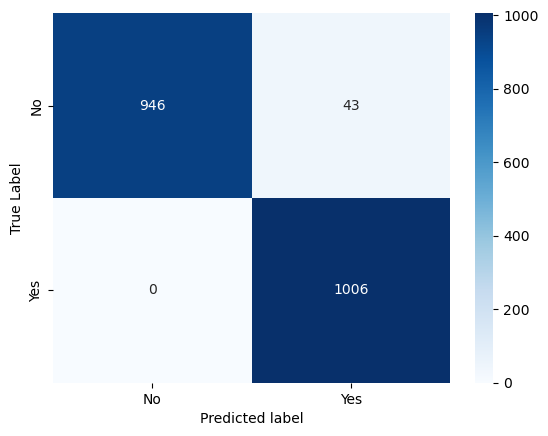

Accuracy :  97.84461152882206
F1 Score:  97.90754257907543
Recall Score:  100.0
Precision Score:  95.90085795996187


In [34]:
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score,confusion_matrix
accuracy=accuracy_score(y_test,bg.predict(x_test))*100
f1=f1_score(y_test,bg.predict(x_test))*100
recall=recall_score(y_test,bg.predict(x_test))*100
precision=precision_score(y_test,bg.predict(x_test))*100
conf_mat=confusion_matrix(y_test,bg.predict(x_test))
print("Decision Tree Classifier ")
sns.heatmap(conf_mat,annot=True,cmap="Blues",xticklabels=["No","Yes"],yticklabels=["No","Yes"],fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.show()

print("Accuracy : ",accuracy)
print("F1 Score: ",f1)
print("Recall Score: ",recall)
print("Precision Score: ",precision)

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(loss='log_loss',n_estimators=100,criterion='squared_error',learning_rate=0.05,max_features=3,verbose=0)
gbc.fit(x_train,y_train)
gbc.score(x_train,y_train)*100,gbc.score(x_test,y_test)*100

(71.8796992481203, 70.0250626566416)

Gradient Boosting Using Decision Tree Classifier 


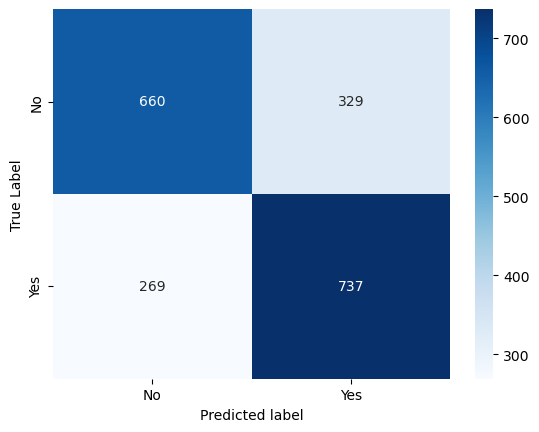

Accuracy :  70.0250626566416
F1 Score:  71.13899613899615
Recall Score:  73.26043737574552
Precision Score:  69.13696060037523


In [36]:
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score,confusion_matrix
accuracy=accuracy_score(y_test,gbc.predict(x_test))*100
f1=f1_score(y_test,gbc.predict(x_test))*100
recall=recall_score(y_test,gbc.predict(x_test))*100
precision=precision_score(y_test,gbc.predict(x_test))*100
conf_mat=confusion_matrix(y_test,gbc.predict(x_test))
print("Gradient Boosting Using Decision Tree Classifier ")
sns.heatmap(conf_mat,annot=True,cmap="Blues",xticklabels=["No","Yes"],yticklabels=["No","Yes"],fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.show()

print("Accuracy : ",accuracy)
print("F1 Score: ",f1)
print("Recall Score: ",recall)
print("Precision Score: ",precision)

# Random Forest Classification

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=30,criterion="entropy",max_features="sqrt",ccp_alpha=0.05)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)*100,rfc.score(x_test,y_test)*100

(62.77121374865736, 64.16040100250626)

In [38]:
cv3=cross_val_score(RandomForestClassifier(n_estimators=50,criterion="gini",max_features="sqrt"),x,y,cv=2)*100
min(cv3),max(cv3)

(93.17293233082707, 94.3157894736842)

In [39]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=50,criterion="gini",max_features="sqrt",verbose=4),n_estimators=50,learning_rate=0.05)
abc.fit(x_train,y_train)
abc.score(x_train,y_train)*100,abc.score(x_test,y_test)*100

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remain

(100.0, 97.64411027568923)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0

Random Forest Classifier 


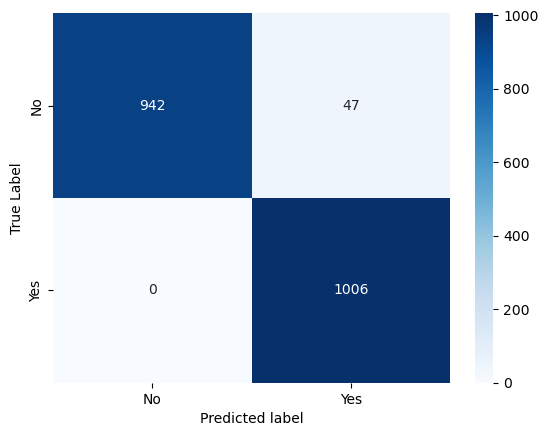

Accuracy :  97.64411027568923
F1 Score:  97.71733851384167
Recall Score:  100.0
Precision Score:  95.53656220322887


In [40]:
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score,confusion_matrix
accuracy=accuracy_score(y_test,abc.predict(x_test))*100
f1=f1_score(y_test,abc.predict(x_test))*100
recall=recall_score(y_test,abc.predict(x_test))*100
precision=precision_score(y_test,abc.predict(x_test))*100
conf_mat=confusion_matrix(y_test,abc.predict(x_test))
print("Random Forest Classifier ")
sns.heatmap(conf_mat,annot=True,cmap="Blues",xticklabels=["No","Yes"],yticklabels=["No","Yes"],fmt="d")
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.show()

print("Accuracy : ",accuracy)
print("F1 Score: ",f1)
print("Recall Score: ",recall)
print("Precision Score: ",precision)

# Final Output(Prediction) 

In [42]:
age=int(input("enter the age: "))
gender=input("Enter Gender: ")
cig=int(input("enter no. of cigrette per day: "))
total_choles=int(input("Total Cholestrol: "))
syt_BP=float(input("systolic BP: "))
dia_BP=float(input("Disystolic BP: "))
BMI=float(input("BMI index: "))
heart_rate=int(input("heart beat: "))
glucose=int(input("diabetes level: "))
feature=[age,gender,cig,total_choles,syt_BP,dia_BP,BMI,heart_rate,glucose]
user_data=le.fit_transform(feature)
predicted=abc.predict([user_data])
if predicted==0:
    print("After getting all information of person,we can predict that person may not affected from Coronary Heart Disease")
elif predicted==1:
    print("After getting all information of person,we can predict that person may get affected from Coronary Heart Disease")

enter the age: 63
Enter Gender: Male
enter no. of cigrette per day: 2
Total Cholestrol: 260
systolic BP: 80
Disystolic BP: 120
BMI index: 33.5
heart beat: 76
diabetes level: 190
After getting all information of person,we can predict that person may not affected from Coronary Heart Disease


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
